# Problem statement
Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period, identify which factors predict future user adoption.

# Solution
[Jump to Conclusion](#conclusion)
## Load Data

In [1]:
import pandas as pd

users = pd.read_csv("takehome_users.csv", encoding='latin-1')
user_engagement = pd.read_csv("takehome_user_engagement.csv")

In [2]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


## Build a dataset
First, let's obtain a target column **adopted_user** and add it to the `users` table to produce a workable raw dataset.

### Helper function

In [6]:
from datetime import datetime

# a function that returns true if the timestamps indicate the user is adopted
# input: list: list of timestamps
# output: int: 0 if not adopted, 1 if adopted
def is_adopted(timestamps):
    if len(timestamps) < 3:
        return 0
    for index in range(len(timestamps) - 2):
        first_date = datetime.strptime(timestamps[index], "%Y-%m-%d %H:%M:%S")
        third_date = datetime.strptime(timestamps[index + 2], "%Y-%m-%d %H:%M:%S")
        three_login_period = (third_date - first_date).days
        if three_login_period >= 7:
            return 1
    return 0

#### Testing helper function

In [7]:
test_input1 = user_engagement[user_engagement.user_id==1].time_stamp.tolist()
test_input2 = user_engagement[user_engagement.user_id==2].time_stamp.tolist()
print('test input 1:', test_input1)
print('test input 2:', test_input2)

test input 1: ['2014-04-22 03:53:30']
test input 2: ['2013-11-15 03:45:04', '2013-11-29 03:45:04', '2013-12-09 03:45:04', '2013-12-25 03:45:04', '2013-12-31 03:45:04', '2014-01-08 03:45:04', '2014-02-03 03:45:04', '2014-02-08 03:45:04', '2014-02-09 03:45:04', '2014-02-13 03:45:04', '2014-02-16 03:45:04', '2014-03-09 03:45:04', '2014-03-13 03:45:04', '2014-03-31 03:45:04']


In [8]:
print(is_adopted(test_input1)) # should output 0
print(is_adopted(test_input2)) # should output 1

0
1


#### Building raw dataset using helper function

In [9]:
adopted_user_column = []
for _id in users.object_id:
    timestamps = user_engagement[user_engagement.user_id==_id].time_stamp.tolist()
    adopted_user_column.append(is_adopted(timestamps))

In [10]:
raw_dataset = users.copy()
raw_dataset.insert(loc=10, column='adopted_user', value=adopted_user_column)
raw_dataset.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


The above is our raw dataset, with `adopted_user` as our target column. To obtain some viable results quickly, we can observe the other columns in this dataset to guess which ones are likely to have an impact on the target. For instance, we know that `email` and `name` are irrelevant in answering our question.

We can consider the most promising columns first and investigate further after finding these initial results. So first, we can create a workable dataset using `creation_source`, `opted_in_to_mailing_list`, `enabled_for_marketing_drip`, `org_id`, and `invited_by_user_id`. For `org_id`, we can use a one hot encoded vector. For `invited_by_user_id`, we can create a new column `invited_by_another_user` that is `0` if they were never invited or `1` if they were invited.

### Initial Dataset

In [11]:
dataset = raw_dataset[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id']]

# add invited_by_another_user column
invited_by_another_user = pd.notnull(raw_dataset.invited_by_user_id).astype(int)
dataset.insert(4, 'invited_by_another_user', invited_by_another_user)

# add one hot encoded org_id and creation_source
dataset = pd.get_dummies(dataset, prefix=['org_id', ''], columns=['org_id', 'creation_source'])
dataset.insert(dataset.columns.size, 'target', raw_dataset.adopted_user)


dataset.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_another_user,org_id_0,org_id_1,org_id_2,org_id_3,org_id_4,org_id_5,org_id_6,...,org_id_413,org_id_414,org_id_415,org_id_416,_GUEST_INVITE,_ORG_INVITE,_PERSONAL_PROJECTS,_SIGNUP,_SIGNUP_GOOGLE_AUTH,target
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Trying to obtain a base model
We can start by obtaining a simple logistic regression model as our base model.

In [12]:
import numpy as np

X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
print('accuracy:', model.score(x_test, y_test))

accuracy: 0.8029166666666666


In [14]:
import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred = model.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

print('auc score:', roc_auc_score(y_test, y_pred))
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

auc score: 0.5000275603571823


<Figure size 640x480 with 1 Axes>

Accuracy is 80%, but observing the ROC curve, we can see that this model is absolutely useless (AUC is 0.5). We can try other models just in case, but at this point it appears that the features we've chosen aren't useful at predicting user adoption.

#### Trying other models

In [15]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


model1 = LinearSVC()
model2 = SVC(kernel='rbf')
model3 = RandomForestClassifier()

In [16]:
model1.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [17]:
model2.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
model3.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

print('auc score for model 1:', roc_auc_score(y_test, y_pred1))
print('auc score for model 2:', roc_auc_score(y_test, y_pred2))
print('auc score for model 3:', roc_auc_score(y_test, y_pred3))

auc score for model 1: 0.5014055782162937
auc score for model 2: 0.5002866277146952
auc score for model 3: 0.5136093043765847


Observing that AUC score is close to 0.5 for all the models above, it is likely that the features we have chosen are not good indicators of user adoption. We can investigate this further by observing if any of the features are highly correlated with the target.

#### Feature correlation with target

We can see below that the correlation values are small, and hence, not highly correlated with the target.

In [20]:
dataset.corr()['target'].sort_values()

_PERSONAL_PROJECTS        -0.091735
org_id_0                  -0.051116
org_id_1                  -0.036295
org_id_2                  -0.034087
org_id_3                  -0.026035
                             ...   
org_id_387                 0.032270
_SIGNUP_GOOGLE_AUTH        0.034865
invited_by_another_user    0.035119
_GUEST_INVITE              0.053537
target                     1.000000
Name: target, Length: 426, dtype: float64

## Investigating more features
Using the remaining columns in the raw_dataset, we can introduce two new features: `num_times_logged_in` indicating number of times a user has logged in and `period_active` indicating the total number of days elapsed between their account creation and their last login date. 

#### Updating dataset to include new features

In [21]:
num_times_logged_in_column = []
for _id in users.object_id:
    num_times_logged_in_column.append(len(user_engagement[user_engagement.user_id==_id]))
    
dataset.insert(dataset.columns.size - 1, 'num_times_logged_in', num_times_logged_in_column)

In [22]:
period_active_column = []
for index in range(users.shape[0]):
    creation_date = datetime.strptime(users.creation_time[index], "%Y-%m-%d %H:%M:%S").date()
    try:
        last_session_date = datetime.fromtimestamp(users.last_session_creation_time[index]).date()
    except ValueError:
        last_session_date = creation_date
    period = (last_session_date - creation_date).days
    period_active_column.append(period)

dataset.insert(dataset.columns.size - 1, 'period_active', period_active_column)

In [23]:
dataset.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_another_user,org_id_0,org_id_1,org_id_2,org_id_3,org_id_4,org_id_5,org_id_6,...,org_id_415,org_id_416,_GUEST_INVITE,_ORG_INVITE,_PERSONAL_PROJECTS,_SIGNUP,_SIGNUP_GOOGLE_AUTH,num_times_logged_in,period_active,target
0,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,-1,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,14,135,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,5,0


#### Trying base model (again)

In [24]:
from sklearn.preprocessing import StandardScaler

X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

sc = StandardScaler()
X = sc.fit_transform(X)

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
print('accuracy:', model.score(x_test, y_test))

accuracy: 0.9708333333333333


auc score: 0.9327573878277919


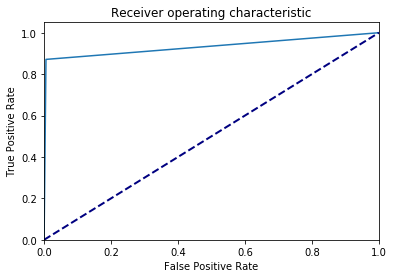

In [26]:
y_pred = model.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

print('auc score:', roc_auc_score(y_test, y_pred))
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

AUC has jumped up to 93.3%. It appears that at least one of the new variables is highly indicative of user adoption. We can evaluate further by observing the correlation.

In [27]:
dataset.corr()['target'].sort_values(ascending=False)

target                     1.000000
period_active              0.699783
num_times_logged_in        0.540194
_GUEST_INVITE              0.053537
invited_by_another_user    0.035119
                             ...   
org_id_3                  -0.026035
org_id_2                  -0.034087
org_id_1                  -0.036295
org_id_0                  -0.051116
_PERSONAL_PROJECTS        -0.091735
Name: target, Length: 428, dtype: float64

Notice that `period_active` and `num_times_logged_in` is highly correlated with the target, indicating they're valuable features. In fact, it's likely that both of these features are correlated to each other, since the longer a user stays active, the more times they're likely to log in. We can verify this correlation also.

In [28]:
dataset.corr()['period_active']['num_times_logged_in']

0.9224387307467438

As suspected, they are indeed correlated to each other. 

## Conclusion: Most important feature <a name="conclusion"></a>
We can find the most important feature by observing the coefficients of our logistic regression model.

In [44]:
feature_names = dataset.iloc[:,:-1].columns.tolist()
feature_coef = model.coef_.tolist()[0]
feature_df = pd.DataFrame({'features': feature_names, 'coef': feature_coef})

In [45]:
feature_df.sort_values(by='coef', ascending=False)

,features,coef
426,period_active,18.998316
425,num_times_logged_in,6.990339
195,org_id_192,0.138039
60,org_id_57,0.137429
20,org_id_17,0.136134
...,...,...
45,org_id_42,-0.194047
16,org_id_13,-0.206100
15,org_id_12,-0.212830
48,org_id_45,-0.240850


Most important feature for user adoption appears to be `period_active`. This implies that the longer the user actively uses the product, the higher the likelihood of that user becoming an adopted user.